<a href="https://colab.research.google.com/github/somi216/semiconductor/blob/main/X_ray_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="R1ecDzSKDITxzhyv9caK")
project = rf.workspace("hongson").project("xray-h5htd")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to xray-1 in yolov11:: 100%|██████████| 21036/21036 [00:04<00:00, 5120.96it/s]


In [ ]:
import yaml

data = {
    'train': '/content/xray-1/train/images',
    'val': '/content/xray-1/valid/images',
    'test': '/content/xray-1/test/images',
    'nc': 14,
    'names': ['0', '1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9']
}

with open('/content/xray-1/data.yaml', 'w') as f:
  yaml.dump(data, f)

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 20.5 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


In [ ]:
model.train(data='/content/xray-1/data.yaml',
            epochs=3,
            batch=32,
            imgsz=224)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/xray-1/data.yaml, epochs=3, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 19.8MB/s]


Overriding model.yaml nc=80 with nc=14

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/xray-1/train/labels... 9198 images, 3 backgrounds, 0 corrupt: 100%|██████████| 9198/9198 [00:04<00:00, 1899.09it/s]

train: WARNING ⚠️ /content/xray-1/train/images/6bfb85750420c5ee853ad5372dcfbd76_jpg.rf.63a678320887edfadacd0b4ce57fe597.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/xray-1/train/images/6bfb85750420c5ee853ad5372dcfbd76_jpg.rf.7e44a0667a20c81ae4a5635560ea7347.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/xray-1/train/images/6bfb85750420c5ee853ad5372dcfbd76_jpg.rf.94899df4611bd72a7d3300182f94d728.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/xray-1/train/images/img--2125-_jpg.rf.47b1721110cf60bf307fa5470ac6e9e2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/xray-1/train/images/img--2125-_jpg.rf.5263fe562a27b405965a7cbd2b280c9b.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/xray-1/train/images/img--2125-_jpg.rf.69dbb2dabe65ed33912e6bde9e133f36.jpg: 1 duplicate labels removed


train: New cache created: /content/xray-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/xray-1/valid/labels... 876 images, 1 backgrounds, 0 corrupt: 100%|██████████| 876/876 [00:00<00:00, 1062.48it/s]


val: New cache created: /content/xray-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.732G       2.85      4.196      1.835        136        224: 100%|██████████| 288/288 [01:09<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.99it/s]

                   all        876       3893      0.854     0.0881     0.0769       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3     0.751G      2.304      2.652      1.453        105        224: 100%|██████████| 288/288 [01:07<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.80it/s]

                   all        876       3893      0.876      0.109      0.117     0.0467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.713G      2.169      2.363      1.392        100        224: 100%|██████████| 288/288 [01:05<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.76it/s]

                   all        876       3893      0.955      0.115      0.126     0.0545



3 epochs completed in 0.062 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,584,882 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]


                   all        876       3893      0.955      0.115      0.126     0.0545
                     0        619        639      0.764      0.806      0.754      0.329
                     1         33         37          1          0     0.0244    0.00553
                    10         99        132          1          0    0.00586    0.00257
                    11        460        491      0.603      0.796      0.694      0.339
                    12         63         75          1          0     0.0487      0.016
                    13         72        119          1          0     0.0347     0.0108
                     2        126        173          1          0     0.0723     0.0182
                     3        243        321          1          0     0.0367     0.0113
                     4        146        317          1    0.00336     0.0214     0.0112
                     5        200        272          1          0    0.00231   0.000794
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a02db0177c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0


image 1/1 /content/xray-1/test/images/0e5734a5483002be04b734d7c88058be_jpg.rf.15e3665b84f46a7d98bded1a2e575759.jpg: 224x224 2 0s, 1 11, 8.3ms
Speed: 0.7ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 224)


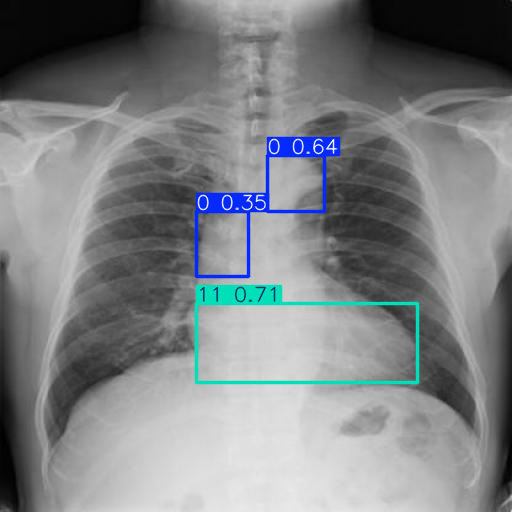

In [ ]:
results = model.predict("/content/xray-1/test/images/0e5734a5483002be04b734d7c88058be_jpg.rf.15e3665b84f46a7d98bded1a2e575759.jpg")

for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")